In [22]:
!pip install "featuretools[complete]"
!conda install python-graphviz

/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::astroid==2.4.2=py38_0
  - defaults/noarch::qtconsole==4.7.7=py_0
  - defaults/noarch::seaborn==0.11.0=py_0
  - defaults/linux-64::mkl_random==1.1.1=py38h0573a6f_0
  - defaults/linux-64::ipykernel==5.3.4=py38h5ca1d4c_0
  - pytorch/linux-64::torchaudio==0.7.2=py38
  - defaults/noarch::python-language-server==0.35.1=py_0
  - defaults/linux-64::widgetsnbextension==3.5.1=py38_0
  - defaults/linux-64::bkcharts==0.2=py38_0
  - defaults/linux-64::pytables==3.6.1=py38h9fd0a39_0
  - defaults/noarch::jupyterlab_server==1.2.0=py_0
  - defaults/linux-64::jupyter==1.0.0=py38_7
  - defaults/linux-64::patsy==0.5.1=py38_0
  - defaults/linux-64::numpy==1.19.2=py38h54aff64_0
  - defaults/linux-64::anaconda-client==1.7.2=py38_0
  - defaults/noarch::sphinx==3.2.1=py_0
  - defaults/linux-64::mkl_fft==1.2.0=py38h23d657b_0
  - defaults/l

Proceed ([y]/n)? ^C

CondaSystemExit: 
Operation aborted.  Exiting.



In [1]:
import featuretools as ft


2021-04-11 09:23:56,082 featuretools - WARNING    Featuretools failed to load plugin tsfresh from library featuretools_tsfresh_primitives.__init__. For a full stack trace, set logging to debug.


In [2]:
data = ft.demo.load_mock_customer()


/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
customers_df = data["customers"]
sessions_df = data["sessions"]
transactions_df = data["transactions"]

/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
customers_df

/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [5]:
entities = {    "customers" : (customers_df, "customer_id"),    
            "sessions" : (sessions_df, "session_id"),   
            "transactions" : (transactions_df, "transaction_id") }

/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
relationships = [("sessions", "session_id", "transactions", "session_id"),
                 ("customers", "customer_id", "sessions", "customer_id")]


/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
feature_matrix_customers, features_defs = ft.dfs(entities=entities,
                                                  relationships=relationships,
                                                  target_entity="customers")


/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
feature_matrix_customers

/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,1057.97,582.193117,78.59,40,-0.476122,312.745952,1,mobile,1,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,931.63,548.905851,154.60,35,-0.277640,258.700528,2,desktop,1,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,847.63,405.237462,66.21,29,2.286086,257.299895,3,desktop,1,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,1157.99,649.657515,131.51,37,0.002764,356.125829,4,mobile,1,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,839.76,472.231119,86.49,30,0.014384,259.873954,5,mobile,1,3


In [9]:
feature = features_defs[18]

/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
feature

/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Feature: WEEKDAY(join_date)>

/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


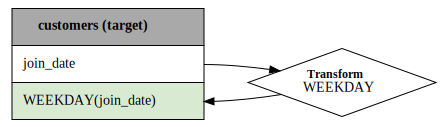

In [11]:
ft.graph_feature(feature)


In [12]:
ft.describe_feature(feature)

/home/b2b/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'The day of the week of the "join_date".'